# Simple autoencoder - Mnist

## Import Mnist data

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

Using TensorFlow backend.


(60000, 784)
(10000, 784)


## Autoencoder structure

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

encoder = Model(input_img, encoded)
autoencoder=Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3672 - val_loss: 0.2715
Epoch 2/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2646 - val_loss: 0.2542
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2445 - val_loss: 0.2327
Epoch 4/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2254 - val_loss: 0.2154
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2102 - val_loss: 0.2024
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1991 - val_loss: 0.1928
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1903 - val_loss: 0.1847
Epoch 8/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1827 - val_loss: 0.1777
Epoch 9/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1763 - val_loss: 0.1719
Epoch

## Testing autoencoder prediction

In [0]:
encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)

## Plotting

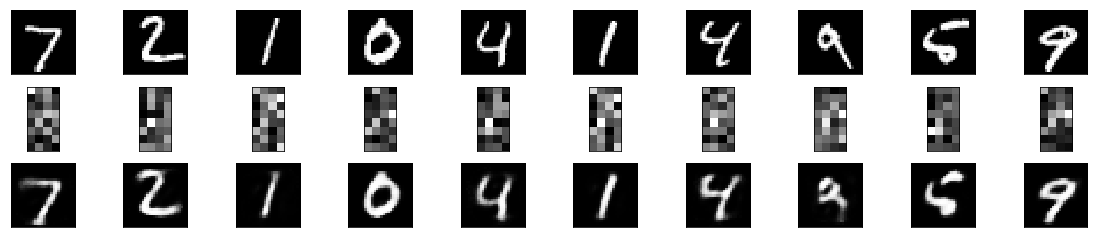

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()